In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import random
num_of_classes = 3

In [14]:
data = open("Data/iris.data","r").readlines()
for i in range(len(data)):
    data[i] = data[i].split(',')

tran_data = data[0:35]+data[50:85]+data[100:135]
random.shuffle(tran_data)
tran_x = []
tran_y = []

for i in range(len(tran_data)):
    tran_x.append([float(j) for j in tran_data[i][0:4]])
    if 'setosa' in tran_data[i][4]:
        tran_y.append([1,0,0])
    elif 'versicolor' in tran_data[i][4]:
        tran_y.append([0,1,0])
    else:
        tran_y.append([0,0,1])

tran_x = np.array(tran_x)
tran_y = np.array(tran_y)
tran_x.shape, tran_y.shape
# tran_y

((105, 4), (105, 3))

In [15]:
model = keras.Sequential()
model.add(Dense(units=50,activation='relu',input_shape=(4,)))
model.add(Dense(units = 25, activation = 'relu'))
# model.add(Dense(units = 30, activation = 'relu'))
# model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = num_of_classes, activation = 'softmax'))
model.summary()
model.compile(loss='CategoricalCrossentropy',optimizer = 'sgd',metrics=[keras.metrics.categorical_accuracy])
history = model.fit(tran_x,tran_y,epochs=300)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 78        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 1.1454 - categorical_accuracy: 0.4300
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 1.0070 - categorical_accuracy: 0.6333
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.9197 - categorical_accuracy: 0.6760
Epoch 4/300
4/4 [==============================] - 0s 2

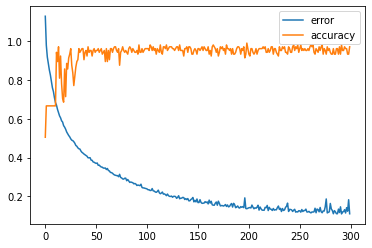

In [16]:
import matplotlib.pyplot as plt
plt.figure('error vs epoch')
plt.plot(history.history['loss'],label = 'error')
plt.plot(history.history['categorical_accuracy'],label = 'accuracy')
plt.legend()
# history.history

In [17]:
test_data = data[35:50]+data[85:100]+data[135:150]

test_x = []
test_y = []

for i in range(len(test_data)):
    test_x.append([float(j) for j in test_data[i][0:4]])
    test_y.append(test_data[i][4])

test_x = np.array(test_x)
test_y = np.array(test_y)
prediction = model.predict(test_x)
for i in range(len(prediction)):
    prediction[i] = [round(prediction[i][0],0),round(prediction[i][1],0),round(prediction[i][2],0)]
prediction


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)